In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, BatchNormalization, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, Conv2DTranspose, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import datetime

from keras import initializers


Using TensorFlow backend.


In [2]:
import gdown 
gdown.download("https://drive.google.com/uc?id={0}".format("1-JVnG_wVJR3VgAwi6-Hhu2C-ZAyQ2-_9"),"gt.pickle",quiet = False)
gdown.download("https://drive.google.com/uc?id={0}".format("1-7E0x-UGFjotUH8UJAWruM9Y0rwEzYzV"),"occ.pickle",quiet = False)

Downloading...
From: https://drive.google.com/uc?id=1-JVnG_wVJR3VgAwi6-Hhu2C-ZAyQ2-_9
To: /content/gt.pickle
179MB [00:02, 69.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-7E0x-UGFjotUH8UJAWruM9Y0rwEzYzV
To: /content/occ.pickle
179MB [00:02, 66.0MB/s]


'occ.pickle'

In [3]:
!ls

gt.pickle  occ.pickle  sample_data


In [4]:
pickle_in = open("occ.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("gt.pickle","rb")
y = pickle.load(pickle_in)

In [5]:
from skimage.transform import resize

x = resize(x, (len(x),64,64,1),anti_aliasing=False)
y= resize(y, (len(y),64,64,1),anti_aliasing=False)

In [6]:
print(x.shape)
print(y.shape)

(4471, 64, 64, 1)
(4471, 64, 64, 1)


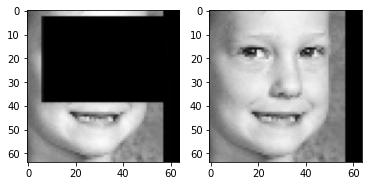

In [7]:



fig = plt.figure(figsize = (6,6))
fig.add_subplot(1,2,1)
plt.imshow(x[0,:,:,0], cmap = "gray")
fig.add_subplot(1,2,2)
plt.imshow(y[0,:,:,0], cmap = "gray")

In [8]:
def creategen():
  generator = Sequential()
  
  generator.add(Conv2D(64,(5,5),strides = (2,2), input_shape = x.shape[1:], padding = "SAME", kernel_initializer = "random_normal" ))
  generator.add(BatchNormalization())
  generator.add(ReLU())
  generator.add(Dropout(0.3))
  
  generator.add(Conv2D(128,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal" ))
  generator.add(BatchNormalization())
  generator.add(ReLU())
  generator.add(Dropout(0.3))
  
  generator.add(Conv2D(256,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal" ))
  generator.add(BatchNormalization())
  generator.add(ReLU())
  generator.add(Dropout(0.3))
  
  
  
  generator.add(Conv2DTranspose(128,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal", use_bias=False ))
  generator.add(BatchNormalization())
  generator.add(ReLU())
  #generator.add(Dropout(0.3))
  
  generator.add(Conv2DTranspose(64,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal", use_bias=False ))
  generator.add(BatchNormalization())
  generator.add(ReLU())
  #generator.add(Dropout(0.3))
  
  
  generator.add(Conv2DTranspose(1,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal", use_bias=False, activation = "sigmoid" ))
  
  return generator



generator = creategen()

In [9]:
def create_disc():
  discriminator = Sequential()
  
  discriminator.add(Conv2D(64,(5,5),strides = (2,2), input_shape = x.shape[1:], padding = "SAME", kernel_initializer = "random_normal" ))
  discriminator.add(BatchNormalization())
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Conv2D(128,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal" ))
  discriminator.add(BatchNormalization())
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Conv2D(256,(5,5),strides = (2,2), padding = "SAME", kernel_initializer = "random_normal" ))
  discriminator.add(BatchNormalization())
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Flatten())
  discriminator.add(Dense(1, activation = "sigmoid"))
  
  return discriminator


discriminator = create_disc()

In [10]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 128)       0

In [11]:
opt_disc = Adam(lr=0.00004)
discriminator.trainable = True
discriminator.compile(loss = "binary_crossentropy", optimizer = opt_disc)
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 16, 16, 128)      

In [12]:
opt_gen = Adam(lr=0.00001)
generator.compile(loss = "mean_squared_error", optimizer = opt_disc)
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 128)       0

In [13]:
def creategan(generator,discriminator):
  gan = Sequential()
  gan.add(generator)
  
  discriminator.trainable = False
  gan.add(discriminator)
  
  return gan

gan = creategan(generator,discriminator)


In [14]:
opt_gan = Adam(lr=0.00001)
gan.compile(loss = "binary_crossentropy", optimizer = opt_gan)
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64, 64, 1)         2054208   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1044225   
Total params: 3,098,433
Trainable params: 2,052,928
Non-trainable params: 1,045,505
_________________________________________________________________


In [15]:
def train (x, y, nepoch):
    
  gen_predict = None
  
  gan_inp = x
  gan_label = np.ones(64)
  gan_predict = None
  
  
  disc_inp = None
  disc_label = np.zeros(64*2)
  disc_label[64:] = 1
  
  disc_predict = None
  
  #sess = tf.Session()
  
  for epoch in range(nepoch):
    for batch_ctr in range(64):
      
      gen_predict = generator.predict(gan_inp[batch_ctr*64:(batch_ctr+1)*64])
      
      if(epoch%2==0):
        
        disc_inp = gen_predict
        disc_label = np.zeros(64)
        
      else:
        disc_inp = y[batch_ctr*64:(batch_ctr+1)*64]
        disc_label = np.ones(64)
        
        
      gen_label = y[batch_ctr*64:(batch_ctr+1)*64]
      
      d_loss = discriminator.train_on_batch(disc_inp,disc_label)
      
      
      gan_loss = gan.train_on_batch(gan_inp[batch_ctr*64:(batch_ctr+1)*64],
                                   gan_label)
      
      gen_loss = generator.train_on_batch(gan_inp[batch_ctr*64:(batch_ctr+1)*64],gen_label)
  
    print("Epoch {0} Gan Loss {1} Disc Loss {2} Gen Loss {3}".format(epoch,gan_loss,d_loss,gen_loss))
    

In [16]:
batch_size = 64
train(x,y,50)

Epoch 0 Gan Loss 1.4265505075454712 Disc Loss 0.00109985307790339 Gen Loss 0.0335487462580204
Epoch 1 Gan Loss 0.05947309732437134 Disc Loss 0.0007862451602704823 Gen Loss 0.024808883666992188
Epoch 2 Gan Loss 0.6351709961891174 Disc Loss 0.001975135412067175 Gen Loss 0.020966969430446625
Epoch 3 Gan Loss 0.05701919272542 Disc Loss 0.005775836296379566 Gen Loss 0.018913011997938156
Epoch 4 Gan Loss 2.62701416015625 Disc Loss 0.0006071977550163865 Gen Loss 0.018798615783452988
Epoch 5 Gan Loss 0.015307358466088772 Disc Loss 0.00249209301546216 Gen Loss 0.01664639264345169
Epoch 6 Gan Loss 6.067762851715088 Disc Loss 4.588279261952266e-05 Gen Loss 0.017125260084867477
Epoch 7 Gan Loss 0.03377828747034073 Disc Loss 0.0010778344003483653 Gen Loss 0.01546013355255127
Epoch 8 Gan Loss 6.671404838562012 Disc Loss 0.0002488060563337058 Gen Loss 0.01584606245160103
Epoch 9 Gan Loss 0.08609559386968613 Disc Loss 0.0032340693287551403 Gen Loss 0.014527997002005577
Epoch 10 Gan Loss 6.636464118957

KeyboardInterrupt: ignored

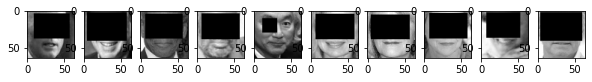

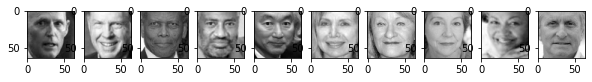

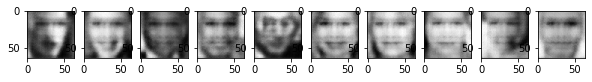

In [17]:
# 15 epoch

a = 4170
b = 4180

pred = generator.predict(x[a:b])

fig = plt.figure(figsize = (10,10))

for ctr in range(10):
  fig.add_subplot(1,10,ctr+1)
  plt.imshow(np.reshape(x[a+ctr], (64,64)), cmap = "gray")
  
fig = plt.figure(figsize = (10,10))  
for ctr in range(10):
  fig.add_subplot(1,10, ctr+1)
  plt.imshow(np.reshape(y[a+ctr], (64,64)),cmap = "gray")
  
fig = plt.figure(figsize = (10,10))  
for ctr in range(10):
  fig.add_subplot(1,10, ctr+1)
  plt.imshow(np.reshape(pred[ctr], (64,64)), cmap = "gray")
  